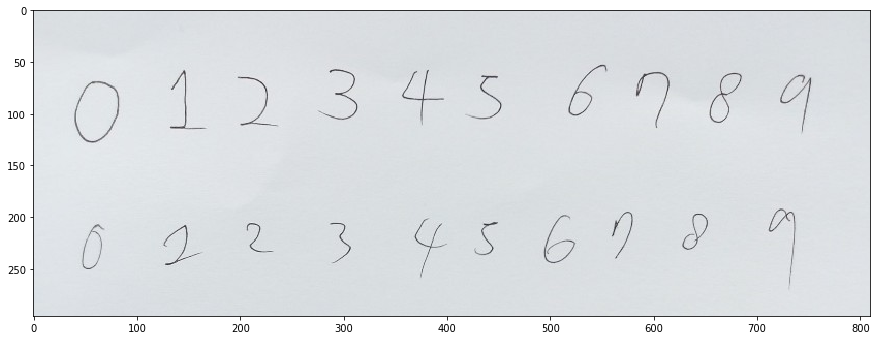

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('number_data/20.jpg')

plt.figure(figsize=(15,12))
plt.imshow(img)

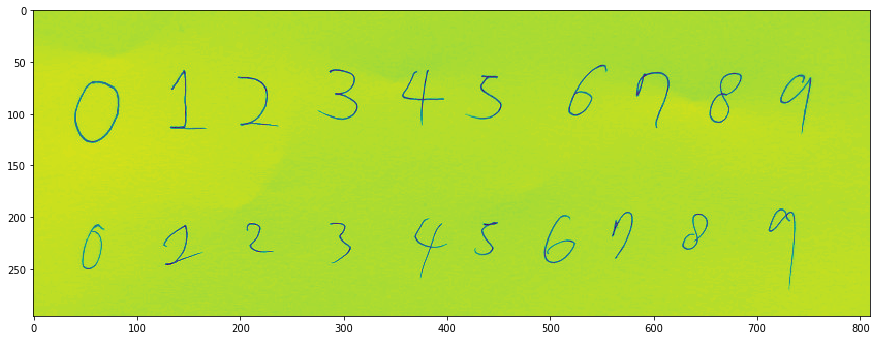

In [51]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
plt.imshow(img_gray);

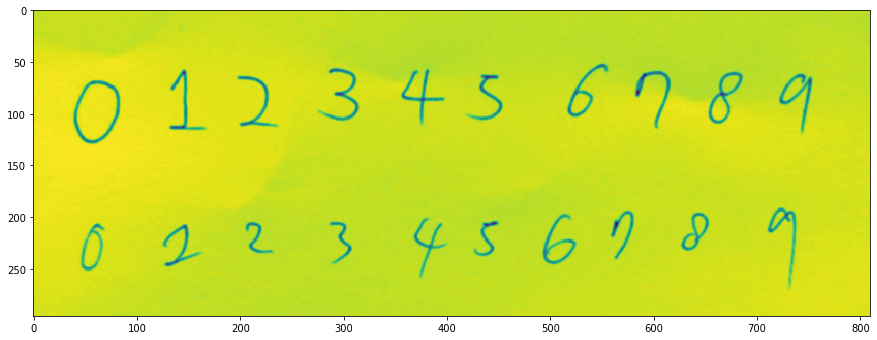

In [52]:
img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.figure(figsize=(15,12))
plt.imshow(img_blur);

In [53]:
ret, img_th = cv2.threshold(img_blur, 200, 200, cv2.THRESH_BINARY_INV)

image, contours, hierachy= cv2.findContours(img_th.copy(), 
                                 cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
rects

[(732, 259, 1, 5),
 (733, 248, 1, 7),
 (126, 207, 35, 41),
 (47, 207, 21, 45),
 (287, 205, 22, 40),
 (206, 205, 26, 30),
 (427, 204, 23, 34),
 (369, 202, 29, 56),
 (494, 197, 31, 49),
 (628, 196, 26, 37),
 (559, 194, 22, 47),
 (711, 191, 27, 56),
 (40, 68, 44, 61),
 (198, 64, 37, 48),
 (722, 62, 32, 55),
 (424, 62, 30, 44),
 (654, 60, 33, 50),
 (583, 59, 34, 55),
 (133, 58, 33, 58),
 (356, 57, 42, 52),
 (282, 56, 33, 51),
 (517, 52, 39, 51)]

In [54]:
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()
tmp

[5,
 7,
 780,
 782,
 880,
 945,
 962,
 1034,
 1320,
 1435,
 1512,
 1519,
 1624,
 1650,
 1683,
 1760,
 1776,
 1870,
 1914,
 1989,
 2184,
 2684]

In [55]:
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>500)and(w*h<500000))]
print(len(rects))
rects

20


[(126, 207, 35, 41),
 (47, 207, 21, 45),
 (287, 205, 22, 40),
 (206, 205, 26, 30),
 (427, 204, 23, 34),
 (369, 202, 29, 56),
 (494, 197, 31, 49),
 (628, 196, 26, 37),
 (559, 194, 22, 47),
 (711, 191, 27, 56),
 (40, 68, 44, 61),
 (198, 64, 37, 48),
 (722, 62, 32, 55),
 (424, 62, 30, 44),
 (654, 60, 33, 50),
 (583, 59, 34, 55),
 (133, 58, 33, 58),
 (356, 57, 42, 52),
 (282, 56, 33, 51),
 (517, 52, 39, 51)]

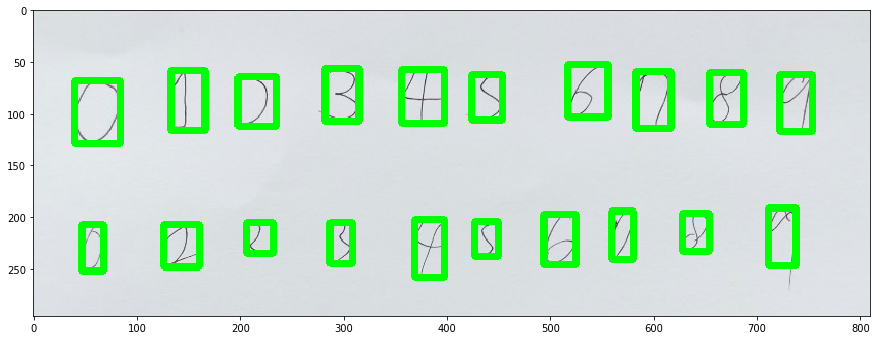

In [56]:
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(15,12))
plt.imshow(img);

In [57]:
cv2.imwrite("number_ROI.jpg", img)

True